In [1]:
from fastTSNE import TSNE, TSNEEmbedding
from fastTSNE.callbacks import ErrorLogger
from fastTSNE.affinity import PerplexityBasedNN, MultiscaleMixture
from fastTSNE import initialization

from examples import utils

import numpy as np
import scipy.sparse as sp
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
import gzip
import pickle

with gzip.open("data/macosko_2015.pkl.gz", "rb") as f:
    data = pickle.load(f)

x = data["pca50"]
y, cluster_ids = data["CellType1"], data["CellType2"]

In [3]:
print("Data set contains %d samples with %d features" % x.shape)

Data set contains 44808 samples with 50 features


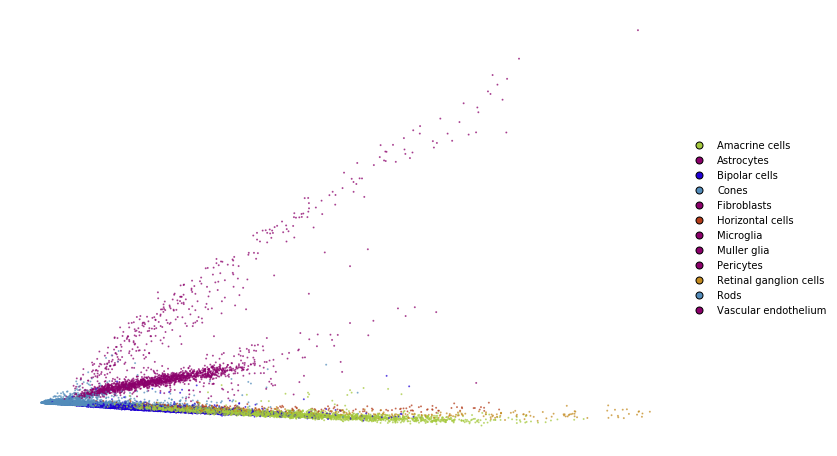

In [4]:
utils.plot(x[:, :2], y, colors=utils.MACOSKO_COLORS)

### Ordinary t-SNE

In [5]:
%time affinities = PerplexityBasedNN(x, perplexity=30, method="approx", n_jobs=8)

CPU times: user 49.9 s, sys: 1.13 s, total: 51 s
Wall time: 20.8 s


In [6]:
%%time
embedding = TSNEEmbedding(
    initialization.random(x, random_state=4), affinities,
    negative_gradient_method="fft", learning_rate=1000, n_jobs=8, callbacks=ErrorLogger(),
)

embedding.optimize(n_iter=250, exaggeration=12, momentum=0.5, inplace=True)
embedding.optimize(n_iter=750, momentum=0.8, inplace=True)

Iteration   50, KL divergence  6.4541, 50 iterations in 1.2000 sec
Iteration  100, KL divergence  5.6869, 50 iterations in 1.1980 sec
Iteration  150, KL divergence  5.5550, 50 iterations in 1.1653 sec
Iteration  200, KL divergence  5.5009, 50 iterations in 1.2610 sec
Iteration  250, KL divergence  5.4746, 50 iterations in 1.2348 sec
Iteration   50, KL divergence  3.8914, 50 iterations in 1.2092 sec
Iteration  100, KL divergence  3.4706, 50 iterations in 1.3889 sec
Iteration  150, KL divergence  3.2575, 50 iterations in 1.9285 sec
Iteration  200, KL divergence  3.1264, 50 iterations in 2.9268 sec
Iteration  250, KL divergence  3.0401, 50 iterations in 3.3526 sec
Iteration  300, KL divergence  2.9806, 50 iterations in 4.8966 sec
Iteration  350, KL divergence  2.9376, 50 iterations in 4.6852 sec
Iteration  400, KL divergence  2.9053, 50 iterations in 6.2742 sec
Iteration  450, KL divergence  2.8807, 50 iterations in 7.2328 sec
Iteration  500, KL divergence  2.8611, 50 iterations in 8.1510

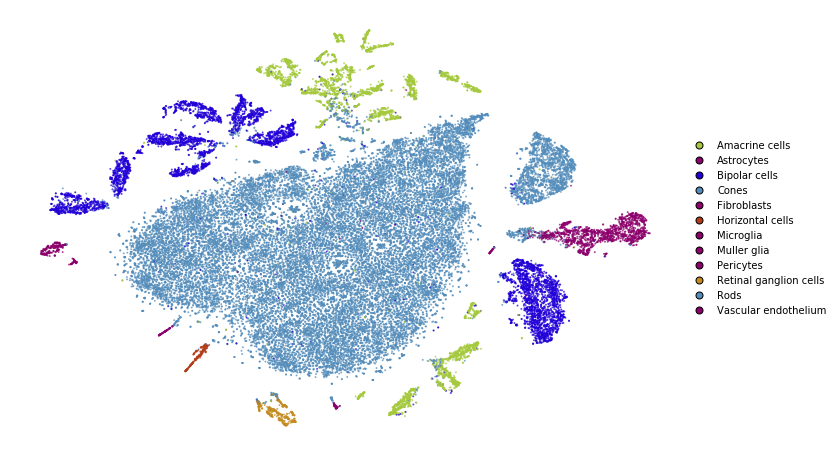

In [7]:
utils.plot(embedding, y, colors=utils.MACOSKO_COLORS)

In [8]:
ordinary_embedding_50 = embedding.view(np.ndarray)

### Larger perplexity

In [9]:
%time affinities = PerplexityBasedNN(x, perplexity=500, method="approx", n_jobs=8)

CPU times: user 9min 33s, sys: 3.32 s, total: 9min 37s
Wall time: 2min 30s


In [10]:
%%time
embedding = TSNEEmbedding(
    initialization.random(x, random_state=np.random.RandomState(0)),
    affinities, negative_gradient_method="fft", learning_rate=1000, n_jobs=8, callbacks=ErrorLogger(),
)

embedding.optimize(n_iter=250, exaggeration=12, momentum=0.5, inplace=True)
embedding.optimize(n_iter=750, momentum=0.8, inplace=True)

Iteration   50, KL divergence  3.8933, 50 iterations in 10.7491 sec
Iteration  100, KL divergence  3.4706, 50 iterations in 10.8289 sec
Iteration  150, KL divergence  3.4614, 50 iterations in 10.8862 sec
Iteration  200, KL divergence  3.4608, 50 iterations in 10.9741 sec
Iteration  250, KL divergence  3.4607, 50 iterations in 10.7170 sec
Iteration   50, KL divergence  1.8143, 50 iterations in 10.8491 sec
Iteration  100, KL divergence  1.6138, 50 iterations in 11.3105 sec
Iteration  150, KL divergence  1.5360, 50 iterations in 11.2386 sec
Iteration  200, KL divergence  1.4992, 50 iterations in 11.5984 sec
Iteration  250, KL divergence  1.4785, 50 iterations in 11.7120 sec
Iteration  300, KL divergence  1.4654, 50 iterations in 12.8669 sec
Iteration  350, KL divergence  1.4574, 50 iterations in 12.9589 sec
Iteration  400, KL divergence  1.4512, 50 iterations in 13.1582 sec
Iteration  450, KL divergence  1.4469, 50 iterations in 13.2815 sec
Iteration  500, KL divergence  1.4437, 50 iterat

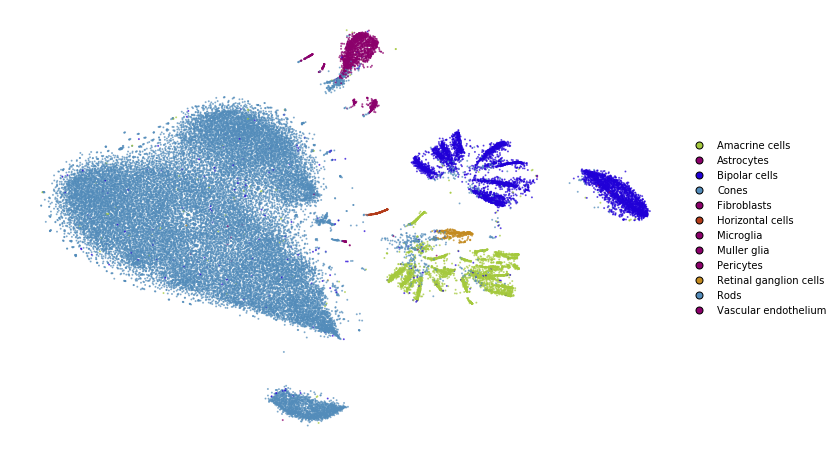

In [11]:
utils.plot(embedding, y, colors=utils.MACOSKO_COLORS)

In [12]:
ordinary_embedding_500 = embedding.view(np.ndarray)

### Multiscale

In [13]:
%time affinities = MultiscaleMixture(x, perplexities=[50, 500], method="approx", n_jobs=8)

CPU times: user 13min 37s, sys: 3.41 s, total: 13min 40s
Wall time: 3min 1s


In [14]:
%time init = initialization.pca(x)

CPU times: user 416 ms, sys: 12 ms, total: 428 ms
Wall time: 71.2 ms


In [15]:
embedding = TSNEEmbedding(
    init, affinities, negative_gradient_method="fft",
    learning_rate=1000, n_jobs=8, callbacks=ErrorLogger(),
)

In [16]:
%time embedding1 = embedding.optimize(n_iter=250, exaggeration=12, momentum=0.5)

Iteration   50, KL divergence  4.4264, 50 iterations in 10.6928 sec
Iteration  100, KL divergence  4.2313, 50 iterations in 10.6835 sec
Iteration  150, KL divergence  4.1902, 50 iterations in 11.0028 sec
Iteration  200, KL divergence  4.1730, 50 iterations in 10.5875 sec
Iteration  250, KL divergence  4.1591, 50 iterations in 10.5361 sec
CPU times: user 7min 12s, sys: 1.44 s, total: 7min 13s
Wall time: 54.3 s


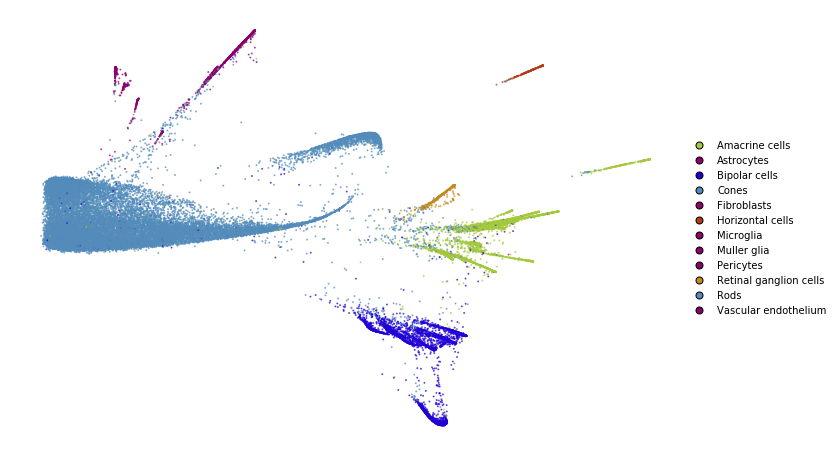

In [17]:
utils.plot(embedding1, y, colors=utils.MACOSKO_COLORS)

In [18]:
%time embedding2 = embedding1.optimize(n_iter=750, exaggeration=2, momentum=0.8)

Iteration   50, KL divergence  2.8841, 50 iterations in 10.9913 sec
Iteration  100, KL divergence  2.6968, 50 iterations in 11.3424 sec
Iteration  150, KL divergence  2.6435, 50 iterations in 11.1942 sec
Iteration  200, KL divergence  2.6184, 50 iterations in 11.4878 sec
Iteration  250, KL divergence  2.6032, 50 iterations in 11.2363 sec
Iteration  300, KL divergence  2.5929, 50 iterations in 11.4845 sec
Iteration  350, KL divergence  2.5848, 50 iterations in 11.2669 sec
Iteration  400, KL divergence  2.5800, 50 iterations in 11.1089 sec
Iteration  450, KL divergence  2.5755, 50 iterations in 11.6529 sec
Iteration  500, KL divergence  2.5715, 50 iterations in 11.5383 sec
Iteration  550, KL divergence  2.5681, 50 iterations in 11.0493 sec
Iteration  600, KL divergence  2.5659, 50 iterations in 11.4327 sec
Iteration  650, KL divergence  2.5645, 50 iterations in 11.0652 sec
Iteration  700, KL divergence  2.5620, 50 iterations in 11.9574 sec
Iteration  750, KL divergence  2.5599, 50 iterat

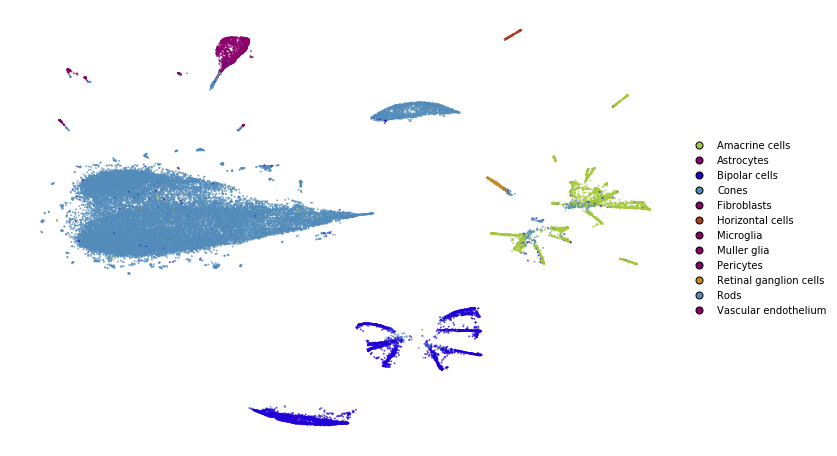

In [19]:
utils.plot(embedding2, y, colors=utils.MACOSKO_COLORS)

In [20]:
%time embedding3 = embedding2.optimize(n_iter=750, exaggeration=1, momentum=0.8)

Iteration   50, KL divergence  2.2406, 50 iterations in 11.8191 sec
Iteration  100, KL divergence  2.1404, 50 iterations in 11.9886 sec
Iteration  150, KL divergence  2.0718, 50 iterations in 12.2266 sec
Iteration  200, KL divergence  2.0202, 50 iterations in 12.6880 sec
Iteration  250, KL divergence  1.9822, 50 iterations in 13.1439 sec
Iteration  300, KL divergence  1.9549, 50 iterations in 13.5779 sec
Iteration  350, KL divergence  1.9351, 50 iterations in 14.6363 sec
Iteration  400, KL divergence  1.9200, 50 iterations in 14.1847 sec
Iteration  450, KL divergence  1.9085, 50 iterations in 15.3171 sec
Iteration  500, KL divergence  1.8992, 50 iterations in 16.5955 sec
Iteration  550, KL divergence  1.8916, 50 iterations in 17.5701 sec
Iteration  600, KL divergence  1.8851, 50 iterations in 16.6197 sec
Iteration  650, KL divergence  1.8794, 50 iterations in 17.2021 sec
Iteration  700, KL divergence  1.8740, 50 iterations in 18.8774 sec
Iteration  750, KL divergence  1.8693, 50 iterat

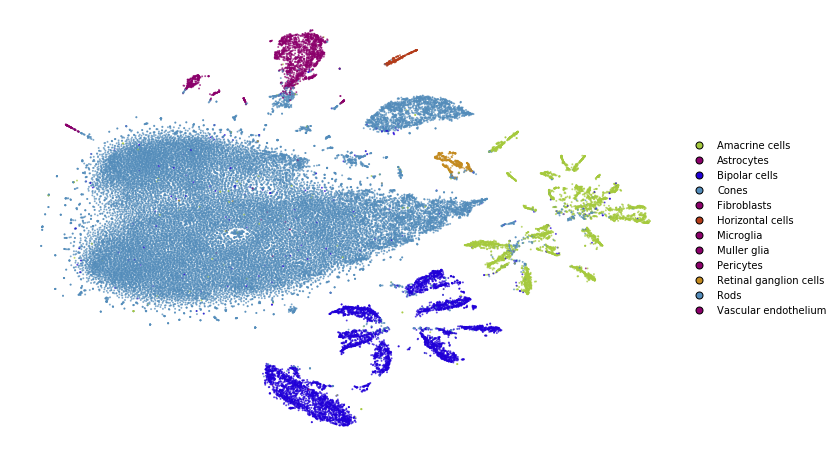

In [21]:
utils.plot(embedding3, y, colors=utils.MACOSKO_COLORS)

In [22]:
multiscale_embedding = embedding3.view(np.ndarray)

### Perplexity annealing

In [23]:
%time affinities = PerplexityBasedNN(x, perplexity=500, method="approx", n_jobs=8)

CPU times: user 9min 33s, sys: 3.22 s, total: 9min 36s
Wall time: 2min 30s


In [24]:
init = initialization.pca(x)

In [25]:
%time affinities.set_perplexity(500)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 10.3 µs


In [26]:
embedding = TSNEEmbedding(
    init, affinities, negative_gradient_method="fft",
    learning_rate=1000, n_jobs=8, callbacks=ErrorLogger(),
)

In [27]:
%time embedding1 = embedding.optimize(n_iter=250, exaggeration=12, momentum=0.5)

Iteration   50, KL divergence  3.5375, 50 iterations in 11.0664 sec
Iteration  100, KL divergence  3.4565, 50 iterations in 11.0119 sec
Iteration  150, KL divergence  3.4549, 50 iterations in 11.1946 sec
Iteration  200, KL divergence  3.4550, 50 iterations in 11.0303 sec
Iteration  250, KL divergence  3.4550, 50 iterations in 10.8996 sec
CPU times: user 7min 25s, sys: 1.55 s, total: 7min 27s
Wall time: 56 s


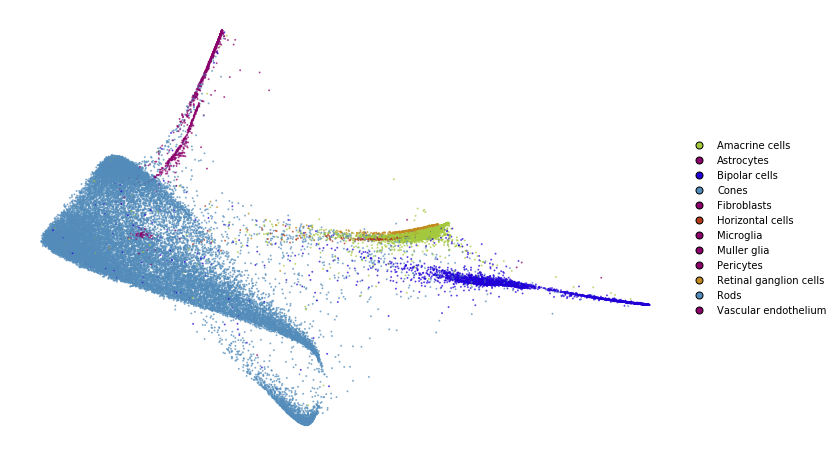

In [28]:
utils.plot(embedding1, y, colors=utils.MACOSKO_COLORS)

In [29]:
%time embedding2 = embedding1.optimize(n_iter=750, exaggeration=1, momentum=0.8)

Iteration   50, KL divergence  1.8031, 50 iterations in 11.0262 sec
Iteration  100, KL divergence  1.6064, 50 iterations in 10.8742 sec
Iteration  150, KL divergence  1.5322, 50 iterations in 11.1954 sec
Iteration  200, KL divergence  1.4962, 50 iterations in 11.5658 sec
Iteration  250, KL divergence  1.4748, 50 iterations in 11.9321 sec
Iteration  300, KL divergence  1.4622, 50 iterations in 12.9326 sec
Iteration  350, KL divergence  1.4538, 50 iterations in 12.3720 sec
Iteration  400, KL divergence  1.4487, 50 iterations in 13.0434 sec
Iteration  450, KL divergence  1.4438, 50 iterations in 12.7593 sec
Iteration  500, KL divergence  1.4408, 50 iterations in 13.0912 sec
Iteration  550, KL divergence  1.4381, 50 iterations in 13.5322 sec
Iteration  600, KL divergence  1.4361, 50 iterations in 13.0036 sec
Iteration  650, KL divergence  1.4341, 50 iterations in 13.6725 sec
Iteration  700, KL divergence  1.4329, 50 iterations in 12.3622 sec
Iteration  750, KL divergence  1.4313, 50 iterat

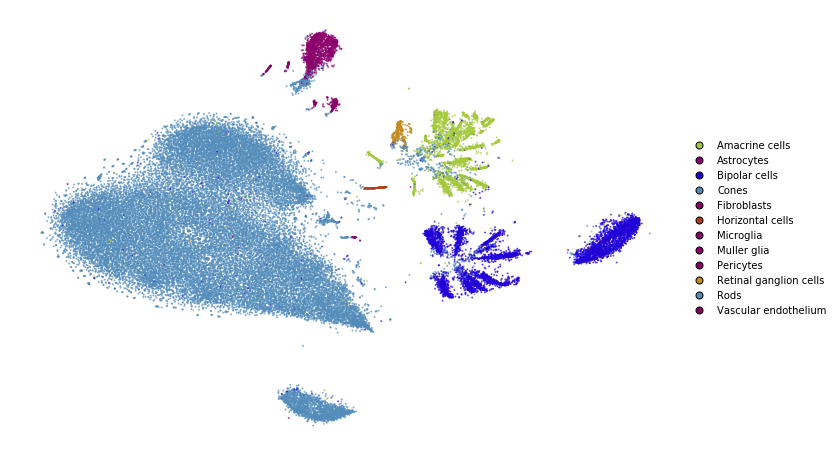

In [30]:
utils.plot(embedding2, y, colors=utils.MACOSKO_COLORS)

In [31]:
%time affinities.set_perplexity(50)

CPU times: user 9.3 s, sys: 172 ms, total: 9.48 s
Wall time: 1.27 s


In [32]:
%time embedding3 = embedding2.optimize(n_iter=250, momentum=0.8)

Iteration   50, KL divergence  2.8244, 50 iterations in 6.1216 sec
Iteration  100, KL divergence  2.7903, 50 iterations in 6.1609 sec
Iteration  150, KL divergence  2.7593, 50 iterations in 5.8454 sec
Iteration  200, KL divergence  2.7304, 50 iterations in 5.5019 sec
Iteration  250, KL divergence  2.7046, 50 iterations in 5.1359 sec
CPU times: user 3min 40s, sys: 10.7 s, total: 3min 50s
Wall time: 28.9 s


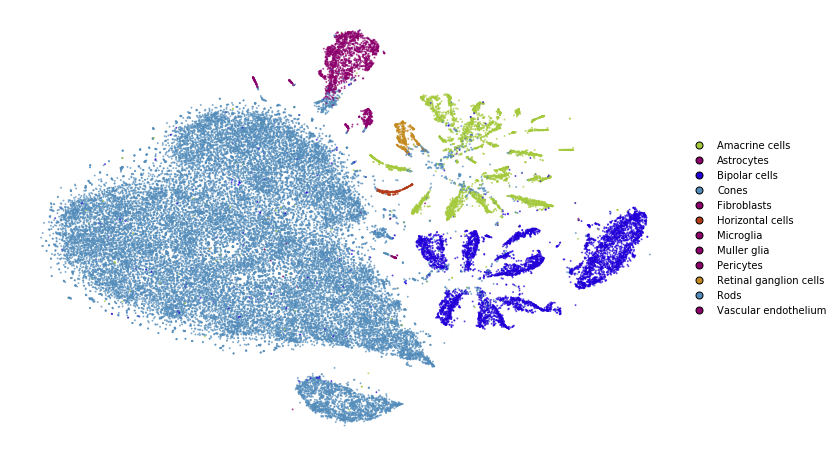

In [33]:
utils.plot(embedding3, y, colors=utils.MACOSKO_COLORS)

In [34]:
annealing_embedding = embedding3.view(np.ndarray)

### Cluster centers

In [35]:
cluster_ids = np.array(data["CellType2"], dtype=float).astype(int)
np.unique(cluster_ids)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

In [36]:
cluster_cell_mapping = {
    1: "Horizontal cells",
    2: "Retinal ganglion cells",
    24: "Rods",
    25: "Cones",
    34: "Muller glia",
    35: "Astrocytes",
    36: "Fibroblasts",
    37: "Vascular endothelium",
    38: "Pericytes",
    39: "Microglia",
}
for i in range(3, 24):
    cluster_cell_mapping[i] = "Amacrine cells"
for i in range(26, 34):
    cluster_cell_mapping[i] = "Bipolar cells"

In [37]:
cluster_ids_ = [cluster_cell_mapping[yi] if yi in (1, 2, 24, 25, 34, 35, 36, 37, 38, 39) else yi 
                for yi in cluster_ids]
cluster_ids_ = np.array(cluster_ids_)
np.unique(cluster_ids_)

array(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '26', '27', '28', '29', '3', '30', '31', '32',
       '33', '4', '5', '6', '7', '8', '9', 'Astrocytes', 'Cones',
       'Fibroblasts', 'Horizontal cells', 'Microglia', 'Muller glia',
       'Pericytes', 'Retinal ganglion cells', 'Rods',
       'Vascular endothelium'], dtype='<U22')

In [38]:
colors = {}
for label in np.unique(cluster_ids_):
    try:
        assert int(label) in cluster_cell_mapping
        colors[label] = utils.MACOSKO_COLORS[cluster_cell_mapping[int(label)]]
    except ValueError:
        colors[label] = utils.MACOSKO_COLORS[label]
        
np.array(list(colors.keys()))

array(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '26', '27', '28', '29', '3', '30', '31', '32',
       '33', '4', '5', '6', '7', '8', '9', 'Astrocytes', 'Cones',
       'Fibroblasts', 'Horizontal cells', 'Microglia', 'Muller glia',
       'Pericytes', 'Retinal ganglion cells', 'Rods',
       'Vascular endothelium'], dtype='<U22')

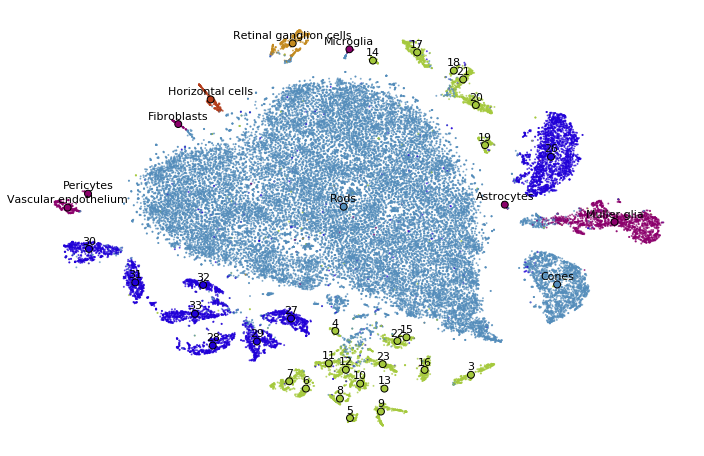

In [46]:
utils.plot(ordinary_embedding_50 * [1, -1], cluster_ids_, colors=colors, fontsize=11,
           draw_centers=True, draw_cluster_labels=True, draw_legend=False)

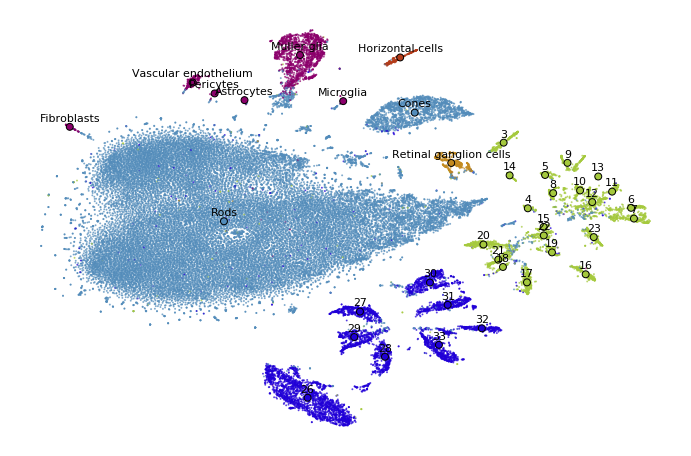

In [39]:
utils.plot(multiscale_embedding, cluster_ids_, colors=colors, fontsize=11,
           draw_centers=True, draw_cluster_labels=True, draw_legend=False)

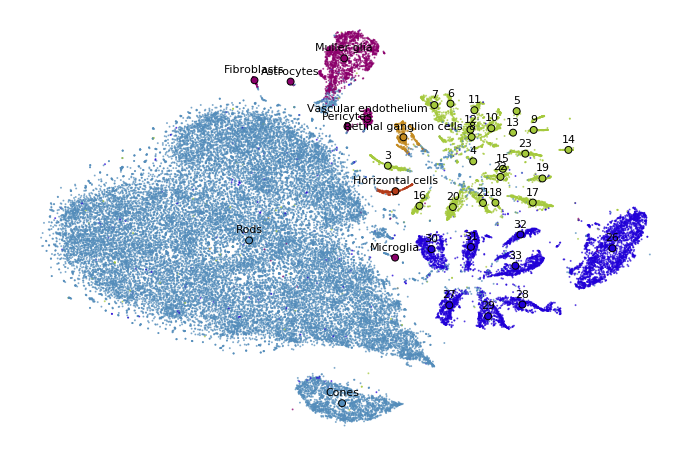

In [42]:
utils.plot(annealing_embedding, cluster_ids_, colors=colors, fontsize=11,
           draw_centers=True, draw_cluster_labels=True, draw_legend=False)

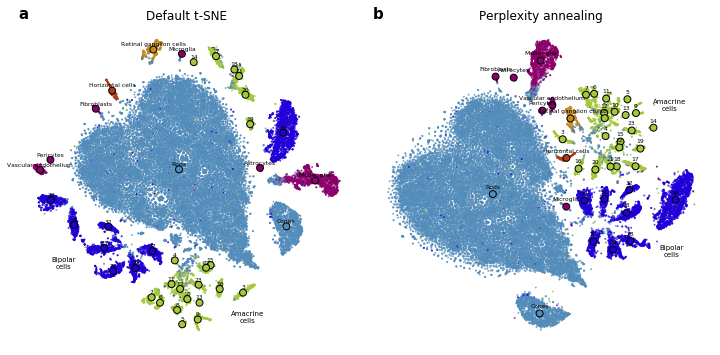

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
utils.plot(ordinary_embedding_50 * [1, -1], cluster_ids_, colors=colors, ax=ax[0],
           title="Default t-SNE", draw_centers=True, draw_cluster_labels=True, draw_legend=False)
plt.text(37, -88, "Amacrine\ncells", color="k", fontsize=7, horizontalalignment="center", transform=ax[0].transData)
plt.text(-72, -55, "Bipolar\ncells", color="k", fontsize=7, horizontalalignment="center", transform=ax[0].transData)


utils.plot(annealing_embedding, cluster_ids_, colors=colors, ax=ax[1],
           title="Perplexity annealing", draw_centers=True, draw_cluster_labels=True, draw_legend=False)
plt.text(55, 30, "Amacrine\ncells", color="k", fontsize=7, horizontalalignment="center", transform=ax[1].transData)
plt.text(56, -27, "Bipolar\ncells", color="k", fontsize=7, horizontalalignment="center", transform=ax[1].transData)

plt.tight_layout()
plt.text(0, 1.02, "a", transform=ax[0].transAxes, fontsize=15, fontweight="bold")
plt.text(0, 1.02, "b", transform=ax[1].transAxes, fontsize=15, fontweight="bold")

plt.savefig("macosko.pdf", dpi=600, transparent=True)